In [ ]:
import statistics
import matplotlib.pyplot as plt 
import numpy as np
from scipy.stats import lognorm
from scipy.stats import truncnorm
from scipy import stats
import pandas as pd
import random

<h1> Problem 1</h1>
You are asked to simulate the demand for different policy scenarios using the an already estimated
model for mode choice in inter-urban trips in Switzerland. Estimated coefficients of a discrete choice
model should be used to simulate the choice probability of each alternative for each agent in a given
sample. Here, we will also be interested in the aggregate market shares (% of people selecting each
alternative) for the entire population and for different segments of the population. The simulation model
should also be used to look at how these aggregate market shares are affected by a change in an
independent variable, i.e. to possible policy scenarios. More specifically, please carry out the following
tasks:

In [ ]:
# Loading data
from google.colab import files
uploaded = files.upload()

Saving swissmetro.dat to swissmetro (4).dat


In [ ]:
# Creating dataframe
from pandas.io.common import dataclasses
data= pd.read_table('swissmetro.dat') 
data

,GROUP,SURVEY,SP,ID,PURPOSE,FIRST,TICKET,WHO,LUGGAGE,AGE,...,TRAIN_TT,TRAIN_CO,TRAIN_HE,SM_TT,SM_CO,SM_HE,SM_SEATS,CAR_TT,CAR_CO,CHOICE
0,2,0,1,1,1,0,1,1,0,3,...,112,48,120,63,52,20,0,117,65,2
1,2,0,1,1,1,0,1,1,0,3,...,103,48,30,60,49,10,0,117,84,2
2,2,0,1,1,1,0,1,1,0,3,...,130,48,60,67,58,30,0,117,52,2
3,2,0,1,1,1,0,1,1,0,3,...,103,40,30,63,52,20,0,72,52,2
4,2,0,1,1,1,0,1,1,0,3,...,130,36,60,63,42,20,0,90,84,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10723,3,1,1,1192,4,1,7,1,0,5,...,148,13,30,93,17,30,0,156,56,2
10724,3,1,1,1192,4,1,7,1,0,5,...,148,12,30,96,16,10,0,96,70,3
10725,3,1,1,1192,4,1,7,1,0,5,...,148,16,60,93,16,20,0,96,56,3
10726,3,1,1,1192,4,1,7,1,0,5,...,178,16,30,96,17,30,0,96,91,2


<h2> Question 1 </h2>
Create an utility-maximizing agent that decides on the mode (CAR vs TRAIN vs SM) to take
given a set of alternative (mode) specific attributes and its own (agent) internal characteristics.
The agent’s action follows the multinomial logit choice model below:

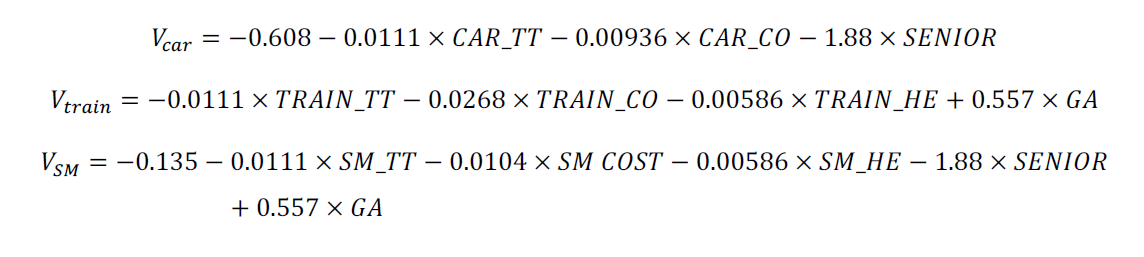

In [ ]:
# Creating dummy variable
data['SENIOR'] = data['AGE']==6
data['SENIOR'] = data['SENIOR']*1

In [ ]:
# Utility functions
def Vcar(CAR_TT,CAR_CO,SENIOR):
    vc=-0.608-0.0111*CAR_TT-0.00936*CAR_CO-1.88*SENIOR
    return vc

def Vtrain(TRAIN_TT, TRAIN_CO,TRAIN_HE,GA):
    vt=-0.0111*TRAIN_TT-0.0268*TRAIN_CO-0.00586*TRAIN_HE+0.557*GA
    return vt

def Vsm(SM_TT,SM_COST,SM_HE,SENIOR,GA):
    vsm=-0.135-0.0111*SM_TT-0.0104*SM_COST-0.00586*SM_HE-1.88*SENIOR+0.557*GA
    return vsm

# Choice probability
def choiceprob(v, vc, vt, vsm, mu):
    p = np.exp(mu*v)/(np.exp(mu*vc) + np.exp(mu*vt)+np.exp(mu*vsm))
    return p

In [ ]:
# Calculating mode choice probabilities

# Calculate choice probability for car
choiceprob(Vcar(data['CAR_TT'], data['CAR_CO'], data['SENIOR']), Vcar(data['CAR_TT'], data['CAR_CO'], data['SENIOR']), Vtrain(data['TRAIN_TT'], data['TRAIN_CO'], data['TRAIN_HE'], data['GA']), Vsm(data['SM_TT'], data['SM_CO'],data['SM_HE'],data['SENIOR'],data['GA']), mu=1)
print("Probabilitites of car \n",choiceprob(Vcar(data['CAR_TT'], data['CAR_CO'], data['SENIOR']), Vcar(data['CAR_TT'], data['CAR_CO'], data['SENIOR']), Vtrain(data['TRAIN_TT'], data['TRAIN_CO'], data['TRAIN_HE'], data['GA']), Vsm(data['SM_TT'], data['SM_CO'],data['SM_HE'],data['SENIOR'],data['GA']), mu=1))

# Calculate choice probability for train
choiceprob(Vtrain(data['TRAIN_TT'], data['TRAIN_CO'],data['TRAIN_HE'],data['GA']), Vcar(data['CAR_TT'], data['CAR_CO'],data['SENIOR']), Vtrain(data['TRAIN_TT'], data['TRAIN_CO'],data['TRAIN_HE'],data['GA']),Vsm(data['SM_TT'], data['SM_CO'],data['SM_HE'],data['SENIOR'],data['GA']), mu=1)
print("Probabilitites of train \n",choiceprob(Vtrain(data['TRAIN_TT'], data['TRAIN_CO'],data['TRAIN_HE'],data['GA']), Vcar(data['CAR_TT'], data['CAR_CO'],data['SENIOR']), Vtrain(data['TRAIN_TT'], data['TRAIN_CO'],data['TRAIN_HE'],data['GA']),Vsm(data['SM_TT'], data['SM_CO'],data['SM_HE'],data['SENIOR'],data['GA']), mu=1))

# Calculate choice probability for person sm
choiceprob(Vsm(data['SM_TT'], data['SM_CO'],data['SM_HE'],data['SENIOR'],data['GA']),Vcar(data['CAR_TT'], data['CAR_CO'],data['SENIOR']), Vtrain(data['TRAIN_TT'], data['TRAIN_CO'],data['TRAIN_HE'],data['GA']),Vsm(data['SM_TT'], data['SM_CO'],data['SM_HE'],data['SENIOR'],data['GA']), mu=1)
print("Probabilitites of metro \n",choiceprob(Vsm(data['SM_TT'], data['SM_CO'],data['SM_HE'],data['SENIOR'],data['GA']),Vcar(data['CAR_TT'], data['CAR_CO'],data['SENIOR']), Vtrain(data['TRAIN_TT'], data['TRAIN_CO'],data['TRAIN_HE'],data['GA']),Vsm(data['SM_TT'], data['SM_CO'],data['SM_HE'],data['SENIOR'],data['GA']), mu=1))


Probabilitites of car 
 0        0.234255
1        0.170975
2        0.278569
3        0.322322
4        0.225982
           ...   
10723    0.146176
10724    0.213902
10725    0.255851
10726    0.217860
10727    0.199741
Length: 10728, dtype: float64
Probabilitites of train 
 0        0.114287
1        0.186598
2        0.140062
3        0.196050
4        0.156694
           ...   
10723    0.293411
10724    0.258299
10725    0.204211
10726    0.206193
10727    0.257089
Length: 10728, dtype: float64
Probabilitites of metro 
 0        0.651458
1        0.642428
2        0.581369
3        0.481628
4        0.617324
           ...   
10723    0.560413
10724    0.527800
10725    0.539938
10726    0.575946
10727    0.543170
Length: 10728, dtype: float64


In [ ]:
# Creating a dataframe with the choice probabilities
df = pd.DataFrame()
df["car"]=choiceprob(Vcar(data['CAR_TT'], data['CAR_CO'], data['SENIOR']), Vcar(data['CAR_TT'], data['CAR_CO'], data['SENIOR']), Vtrain(data['TRAIN_TT'], data['TRAIN_CO'], data['TRAIN_HE'], data['GA']), Vsm(data['SM_TT'], data['SM_CO'],data['SM_HE'],data['SENIOR'],data['GA']), mu=1)
df["train"]=choiceprob(Vtrain(data['TRAIN_TT'], data['TRAIN_CO'],data['TRAIN_HE'],data['GA']), Vcar(data['CAR_TT'], data['CAR_CO'],data['SENIOR']), Vtrain(data['TRAIN_TT'], data['TRAIN_CO'],data['TRAIN_HE'],data['GA']),Vsm(data['SM_TT'], data['SM_CO'],data['SM_HE'],data['SENIOR'],data['GA']), mu=1)
df["metro"]=choiceprob(Vsm(data['SM_TT'], data['SM_CO'],data['SM_HE'],data['SENIOR'],data['GA']),Vcar(data['CAR_TT'], data['CAR_CO'],data['SENIOR']), Vtrain(data['TRAIN_TT'], data['TRAIN_CO'],data['TRAIN_HE'],data['GA']),Vsm(data['SM_TT'], data['SM_CO'],data['SM_HE'],data['SENIOR'],data['GA']), mu=1)

# Including variables that are needed for further tasks
df["income"]=data["INCOME"]
df["Car_Av"]=data["CAR_AV"]
df["Train_Av"]=data["TRAIN_AV"]
df["Metro_Av"]=data["SM_AV"]

df.loc[df['Car_Av'] == 0]

,car,train,metro,income,Car_Av,Train_Av,Metro_Av
9,0.758230,0.016976,0.224794,1,0,1,1
10,0.717049,0.031777,0.251174,1,0,1,1
11,0.800713,0.018467,0.180820,1,0,1,1
12,0.741671,0.042970,0.215359,1,0,1,1
13,0.720314,0.024833,0.254853,1,0,1,1
...,...,...,...,...,...,...,...
3964,0.516494,0.135485,0.348021,1,0,1,1
3965,0.512464,0.116785,0.370751,1,0,1,1
3966,0.523359,0.126314,0.350327,1,0,1,1
3967,0.490350,0.211583,0.298067,1,0,1,1


<h2> Question 2 </h2>
<ol>
<li> Compute the estimated market shares by both sample enumeration and simulation for the entire sample provided in the data file (N=10728).</li>
<li> Comment on both their values.</li>
<li> Compare against the observed market shares (computed using the CHOICE variable in the data set).</li>

In [ ]:
# Checking Car availability
df["Car_Av"].sum()

9045

In [ ]:
# Checking Train availability
df["Train_Av"].sum()

10728

In [ ]:
# Checking Metro availability
df["Metro_Av"].sum()

10728

In [ ]:
# Changing probabilities if the is no availability of car 
for i in range(len(df)):  
  if df["Car_Av"][i]==0:
    df["car"][i]=0
    comb=df["train"][i]+df["metro"][i]
    df["train"][i]=df["train"][i]/comb
    df["metro"][i]=df["metro"][i]/comb

df.loc[df['Car_Av'] == 0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,car,train,metro,income,Car_Av,Train_Av,Metro_Av
9,0.0,0.070214,0.929786,1,0,1,1
10,0.0,0.112306,0.887694,1,0,1,1
11,0.0,0.092667,0.907333,1,0,1,1
12,0.0,0.166339,0.833661,1,0,1,1
13,0.0,0.088790,0.911210,1,0,1,1
...,...,...,...,...,...,...,...
3964,0.0,0.280214,0.719786,1,0,1,1
3965,0.0,0.239541,0.760459,1,0,1,1
3966,0.0,0.265008,0.734992,1,0,1,1
3967,0.0,0.415154,0.584846,1,0,1,1


In [ ]:
# Market shares by enumeration
print('The marketshare of cars is:', df["car"].sum()/len(df))
print('The marketshare of trains is:',df["train"].sum()/len(df))
print('The marketshare of metro is:',df["metro"].sum()/len(df))


The marketshare of cars is: 0.33429574655400646
The marketshare of trains is: 0.07381897125820042
The marketshare of metro is: 0.591885282187793


In [ ]:
# Chosing between the different alternatives based on their probabilities
rng = np.random.default_rng(1)

cars=0
trains=0
metros=0

for row in df.index:  
  prob=random.uniform(0, 1)

  if prob <= df["car"][row]:
    #print('The agent choses to take the car.')
    cars+=1
  elif prob > df["car"][row] and prob<= (df["car"][row]+df["train"][row]):
    #print('The agent choses to take the train.')
    trains+=1
  elif prob> (df["car"][row]+df["train"][row]):
    #print('The agent choses to take the metro.')
    metros+=1

# Market shares by simulation
print('The marketshare of cars is:',cars/len(df))
print('The marketshare of trains is:',trains/len(df))
print('The marketshare of metro is:',metros/len(df))

The marketshare of cars is: 0.33174869500372856
The marketshare of trains is: 0.07345264727815064
The marketshare of metro is: 0.5947986577181208


In [ ]:
# Explore the observed choices
data["CHOICE"].value_counts()

2    6216
3    3080
1    1423
0       9
Name: CHOICE, dtype: int64

In [ ]:
# Observed market shares

print('The marketshare of cars is:',3080/(len(data)-9))
print('The marketshare of trains is:',1423/(len(data)-9))
print('The marketshare of metro is:',6216/(len(data)-9))

The marketshare of cars is: 0.2873402369624032
The marketshare of trains is: 0.1327549211680194
The marketshare of metro is: 0.5799048418695774


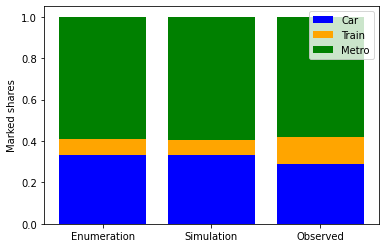

In [ ]:
# Bar chart of market shares
x = ['Enumeration', 'Simulation', 'Observed']
y1 = np.array([df['car'].sum()/len(df), cars/len(df), 3080/len(data)])
y2 = np.array([df['train'].sum()/len(df), trains/len(df), 1423/len(data)])
y3 = np.array([df['metro'].sum()/len(df), metros/len(df), 6216/len(data)])

plt.bar(x, y1, color='blue')
plt.bar(x, y2, bottom=y1, color='orange')
plt.bar(x, y3, bottom=y1+y2, color='green')
plt.ylabel("Marked shares")
plt.legend(["Car", "Train", "Metro"])
plt.show()

In [ ]:
df.loc[df['Car_Av'] == 0]

,car,train,metro,income,Car_Av,Train_Av,Metro_Av
9,0.0,0.070214,0.929786,1,0,1,1
10,0.0,0.112306,0.887694,1,0,1,1
11,0.0,0.092667,0.907333,1,0,1,1
12,0.0,0.166339,0.833661,1,0,1,1
13,0.0,0.088790,0.911210,1,0,1,1
...,...,...,...,...,...,...,...
3964,0.0,0.280214,0.719786,1,0,1,1
3965,0.0,0.239541,0.760459,1,0,1,1
3966,0.0,0.265008,0.734992,1,0,1,1
3967,0.0,0.415154,0.584846,1,0,1,1


<h2> Question 3 </h2>
Suppose that we know that market segmentation exists on income. We can then consider three
markets, namely, low income, medium income and high income that are defined as follows:
<ul>
<li>Low Income: under CHF 50,000 (INCOME = 0 or 1)</li>
<li> Medium Income: between CHF 50,000 and CHF 100,000 (INCOME = 2)</li>
<li> High Income: Over CHF 100,000 (INCOME= 3).</li>
</ul>

In [ ]:
low_inc=0     # number of people in low income group
medium_inc=0  # number of people in medium income group
high_inc=0    # number of people in high income group

scarl=0       # share of cars in low income group
strainl=0     # train low income group
smetrol=0     # metro low income group
scarm=0       # car medium income group
strainm=0     # train medium income group
smetrom=0     # metro medium income group
scarh=0       # car high income group
strainh=0     # train high income group
smetroh=0     # metro high income group

for row in df.index:
  
  if df["income"][row] <= 1:
    scarl+=df['car'][row]
    strainl+=df['train'][row]
    smetrol+=df['metro'][row]
    low_inc+=1
  elif df["income"][row] == 2:
    scarm+=df['car'][row]
    strainm+=df['train'][row]
    smetrom+=df['metro'][row]
    medium_inc+=1
  else:
    scarh+=df['car'][row]
    strainh+=df['train'][row]
    smetroh+=df['metro'][row]
    high_inc+=1

# Market shares by income group

# Market shares for low income
print('The marketshare of cars for low income is:',scarl/low_inc)
print('The marketshare of trains for low income is:',strainl/low_inc)
print('The marketshare of metro for low income is:',smetrol/low_inc)

# Market shares for medium income
print('The marketshare of cars for medium income is:',scarm/medium_inc)
print('The marketshare of trains for medium income is:',strainm/medium_inc)
print('The marketshare of metro for medium income is:',smetrom/medium_inc)
# Market shares for high income
print('The marketshare of cars for high income is:',scarh/high_inc)
print('The marketshare of trains for high income is:',strainh/high_inc)
print('The marketshare of metro for high income is:',smetroh/high_inc)

The marketshare of cars for low income is: 0.2496835156405067
The marketshare of trains for low income is: 0.08941320061405797
The marketshare of metro for low income is: 0.6609032837454332
The marketshare of cars for medium income is: 0.3436911832740033
The marketshare of trains for medium income is: 0.0802256043400907
The marketshare of metro for medium income is: 0.5760832123859041
The marketshare of cars for high income is: 0.3617535510549478
The marketshare of trains for high income is: 0.06261414191675879
The marketshare of metro for high income is: 0.5756323070282939


In [ ]:
data['NEW_SM_CO'] = data['SM_CO']
df['new_metro'] = df['metro']
df['new_car'] = df['car']
df['new_train'] = df['train']

marketshares = pd.DataFrame(columns=['lc','lt','lm','mc','mt','mm','hc','ht','hm','prc'],index=range(41))

for i in range(-20, 21, 1):

  data['NEW_SM_CO'] = data['SM_CO'] * ((i+100)/100)

  df["new_car"]=choiceprob(Vcar(data['CAR_TT'], data['CAR_CO'], data['SENIOR']), Vcar(data['CAR_TT'], data['CAR_CO'], data['SENIOR']), Vtrain(data['TRAIN_TT'], data['TRAIN_CO'], data['TRAIN_HE'], data['GA']), Vsm(data['SM_TT'], data['NEW_SM_CO'],data['SM_HE'],data['SENIOR'],data['GA']), mu=1)
  df["new_train"]=choiceprob(Vtrain(data['TRAIN_TT'], data['TRAIN_CO'],data['TRAIN_HE'],data['GA']), Vcar(data['CAR_TT'], data['CAR_CO'],data['SENIOR']), Vtrain(data['TRAIN_TT'], data['TRAIN_CO'],data['TRAIN_HE'],data['GA']),Vsm(data['SM_TT'], data['NEW_SM_CO'],data['SM_HE'],data['SENIOR'],data['GA']), mu=1)
  df["new_metro"]=choiceprob(Vsm(data['SM_TT'], data['NEW_SM_CO'],data['SM_HE'],data['SENIOR'],data['GA']),Vcar(data['CAR_TT'], data['CAR_CO'],data['SENIOR']), Vtrain(data['TRAIN_TT'], data['TRAIN_CO'],data['TRAIN_HE'],data['GA']),Vsm(data['SM_TT'], data['NEW_SM_CO'],data['SM_HE'],data['SENIOR'],data['GA']), mu=1)

  # Changing probabilities
  for j in range(len(df)):  
    if df["Car_Av"][j]==0:
      df["new_car"][j]=0
      comb=df["new_train"][j]+df["new_metro"][j]
      df["new_train"][j]=df["new_train"][j]/comb
      df["new_metro"][j]=df["new_metro"][j]/comb

  low_inc = 0
  medium_inc = 0
  high_inc = 0
  
  lowcar=0 # share of cars in low income group
  lowtrain=0 # train low income
  lowmetro=0 # metro low income
  medcar=0 # car medium income
  medtrain=0 # train medium
  medmetro=0 # metro medium
  highcar=0 # car high income
  hightrain=0 # train high
  highmetro=0 # metro high

  for row in df.index:
  
    if df["income"][row] <= 1:
      lowcar+=df['new_car'][row]
      lowtrain+=df['new_train'][row]
      lowmetro+=df['new_metro'][row]
      low_inc += 1
    elif df["income"][row] == 2:
      medcar+=df['new_car'][row]
      medtrain+=df['new_train'][row]
      medmetro+=df['new_metro'][row]
      medium_inc += 1
    else:
      highcar+=df['new_car'][row]
      hightrain+=df['new_train'][row]
      highmetro+=df['new_metro'][row]
      high_inc += 1

  marketshares['lc'][i+20] = lowcar/low_inc
  marketshares['lt'][i+20] = lowtrain/low_inc
  marketshares['lm'][i+20] = lowmetro/low_inc
  marketshares['mc'][i+20] = medcar/medium_inc
  marketshares['mt'][i+20] = medtrain/medium_inc
  marketshares['mm'][i+20] = medmetro/medium_inc
  marketshares['hc'][i+20] = highcar/high_inc
  marketshares['ht'][i+20] = hightrain/high_inc
  marketshares['hm'][i+20] = highmetro/high_inc
  marketshares['prc'][i+20] = i

marketshares

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,lc,lt,lm,mc,mt,mm,hc,ht,hm,prc
0,0.230235,0.082602,0.687163,0.311862,0.073546,0.614592,0.322122,0.05646,0.621418,-20
1,0.231196,0.082928,0.685876,0.313441,0.073868,0.612691,0.324069,0.056755,0.619175,-19
2,0.232158,0.083256,0.684586,0.315021,0.074192,0.610787,0.326022,0.057052,0.616926,-18
3,0.233122,0.083585,0.683293,0.316603,0.074516,0.60888,0.327979,0.05735,0.614671,-17
4,0.234087,0.083916,0.681997,0.318187,0.074842,0.606971,0.329941,0.057649,0.61241,-16
5,0.235054,0.084248,0.680698,0.319773,0.07517,0.605058,0.331907,0.057949,0.610144,-15
6,0.236022,0.084581,0.679397,0.32136,0.075498,0.603142,0.333876,0.058251,0.607872,-14
7,0.236992,0.084916,0.678092,0.322948,0.075828,0.601224,0.33585,0.058554,0.605595,-13
8,0.237962,0.085253,0.676785,0.324538,0.076159,0.599303,0.337827,0.058859,0.603314,-12
9,0.238934,0.085591,0.675475,0.32613,0.076491,0.597379,0.339808,0.059165,0.601027,-11


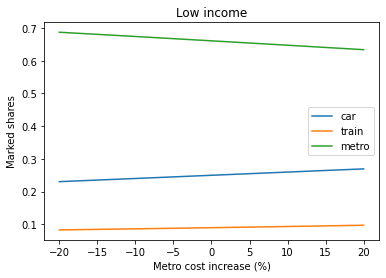

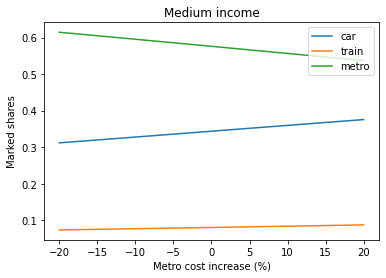

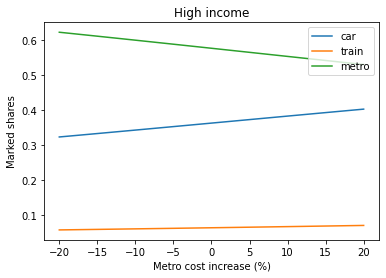

In [ ]:
# Combined plots

plt.plot(marketshares['prc'], marketshares['lc'], label = "car")
plt.plot(marketshares['prc'], marketshares['lt'], label = "train")
plt.plot(marketshares['prc'], marketshares['lm'], label = "metro")
plt.title('Low income')
plt.xlabel("Metro cost increase (%)")
plt.ylabel("Marked shares")
plt.legend()
plt.show()

plt.plot(marketshares['prc'], marketshares['mc'], label = "car")
plt.plot(marketshares['prc'], marketshares['mt'], label = "train")
plt.plot(marketshares['prc'], marketshares['mm'], label = "metro")
plt.title('Medium income')
plt.xlabel("Metro cost increase (%)")
plt.ylabel("Marked shares")
plt.legend()
plt.show()

plt.plot(marketshares['prc'], marketshares['hc'], label = "car")
plt.plot(marketshares['prc'], marketshares['ht'], label = "train")
plt.plot(marketshares['prc'], marketshares['hm'], label = "metro")
plt.title('High income')
plt.xlabel("Metro cost increase (%)")
plt.ylabel("Marked shares")
plt.legend()
plt.show()